# Imports and custom functions

In [1]:
import pandas as pd
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
plotly.offline.init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Global options

sns.set_style("white")
sns.set(font_scale=1, style="ticks")

height=15
aspect=1
x_jitter=0
y_jitter=0

xlim=(0,14)
ylim=(-14, 10)
alpha=1
marker='.'
legend=False

# Input files

#### oscillating_genes

In [3]:
oscillating_genes_path = "/tungstenfs/groups/ggrossha/gypafoiv/resources/worm/other/oscillating_genes_Milou_Yannick/2019_04_30/2019-01-31_AllOsc_info_CIclass.csv"

In [4]:
oscillating_genes = pd.read_csv(oscillating_genes_path)
oscillating_genes.columns=["Name", "Amplitude", "Phase"]
oscillating_genes = oscillating_genes["Name"].tolist()

#### time series

In [5]:
public_path = "../GSE52910/results/salmon/quant_reads/quant.genes.TPM.tsv"

In [6]:
df_public = pd.read_csv(public_path, header=0, sep="\t")
df_public.set_index("Name", inplace=True)

In [7]:
df_public_osc = df_public[df_public.index.isin(oscillating_genes)]

#### dpf3 total RNA-seq 15C

In [8]:
dpf3_total_rna_seq_path = "../total_RNAseq_dpf3_15_C/results/salmon/quant_reads/quant.genes.TPM.tsv"

In [9]:
df_dpf3_total_rna_seq = pd.read_csv(dpf3_total_rna_seq_path, header=0, sep="\t")
df_dpf3_total_rna_seq.set_index("Name", inplace=True)

In [10]:
df_dpf3_total_rna_seq_osc = df_dpf3_total_rna_seq[df_dpf3_total_rna_seq.index.isin(oscillating_genes)]

#### merge datasets

In [11]:
merged_genes = pd.merge(df_public, df_dpf3_total_rna_seq, left_index=True, right_index=True)

In [12]:
merged_osc_genes = pd.merge(df_public_osc, df_dpf3_total_rna_seq_osc, left_index=True, right_index=True)

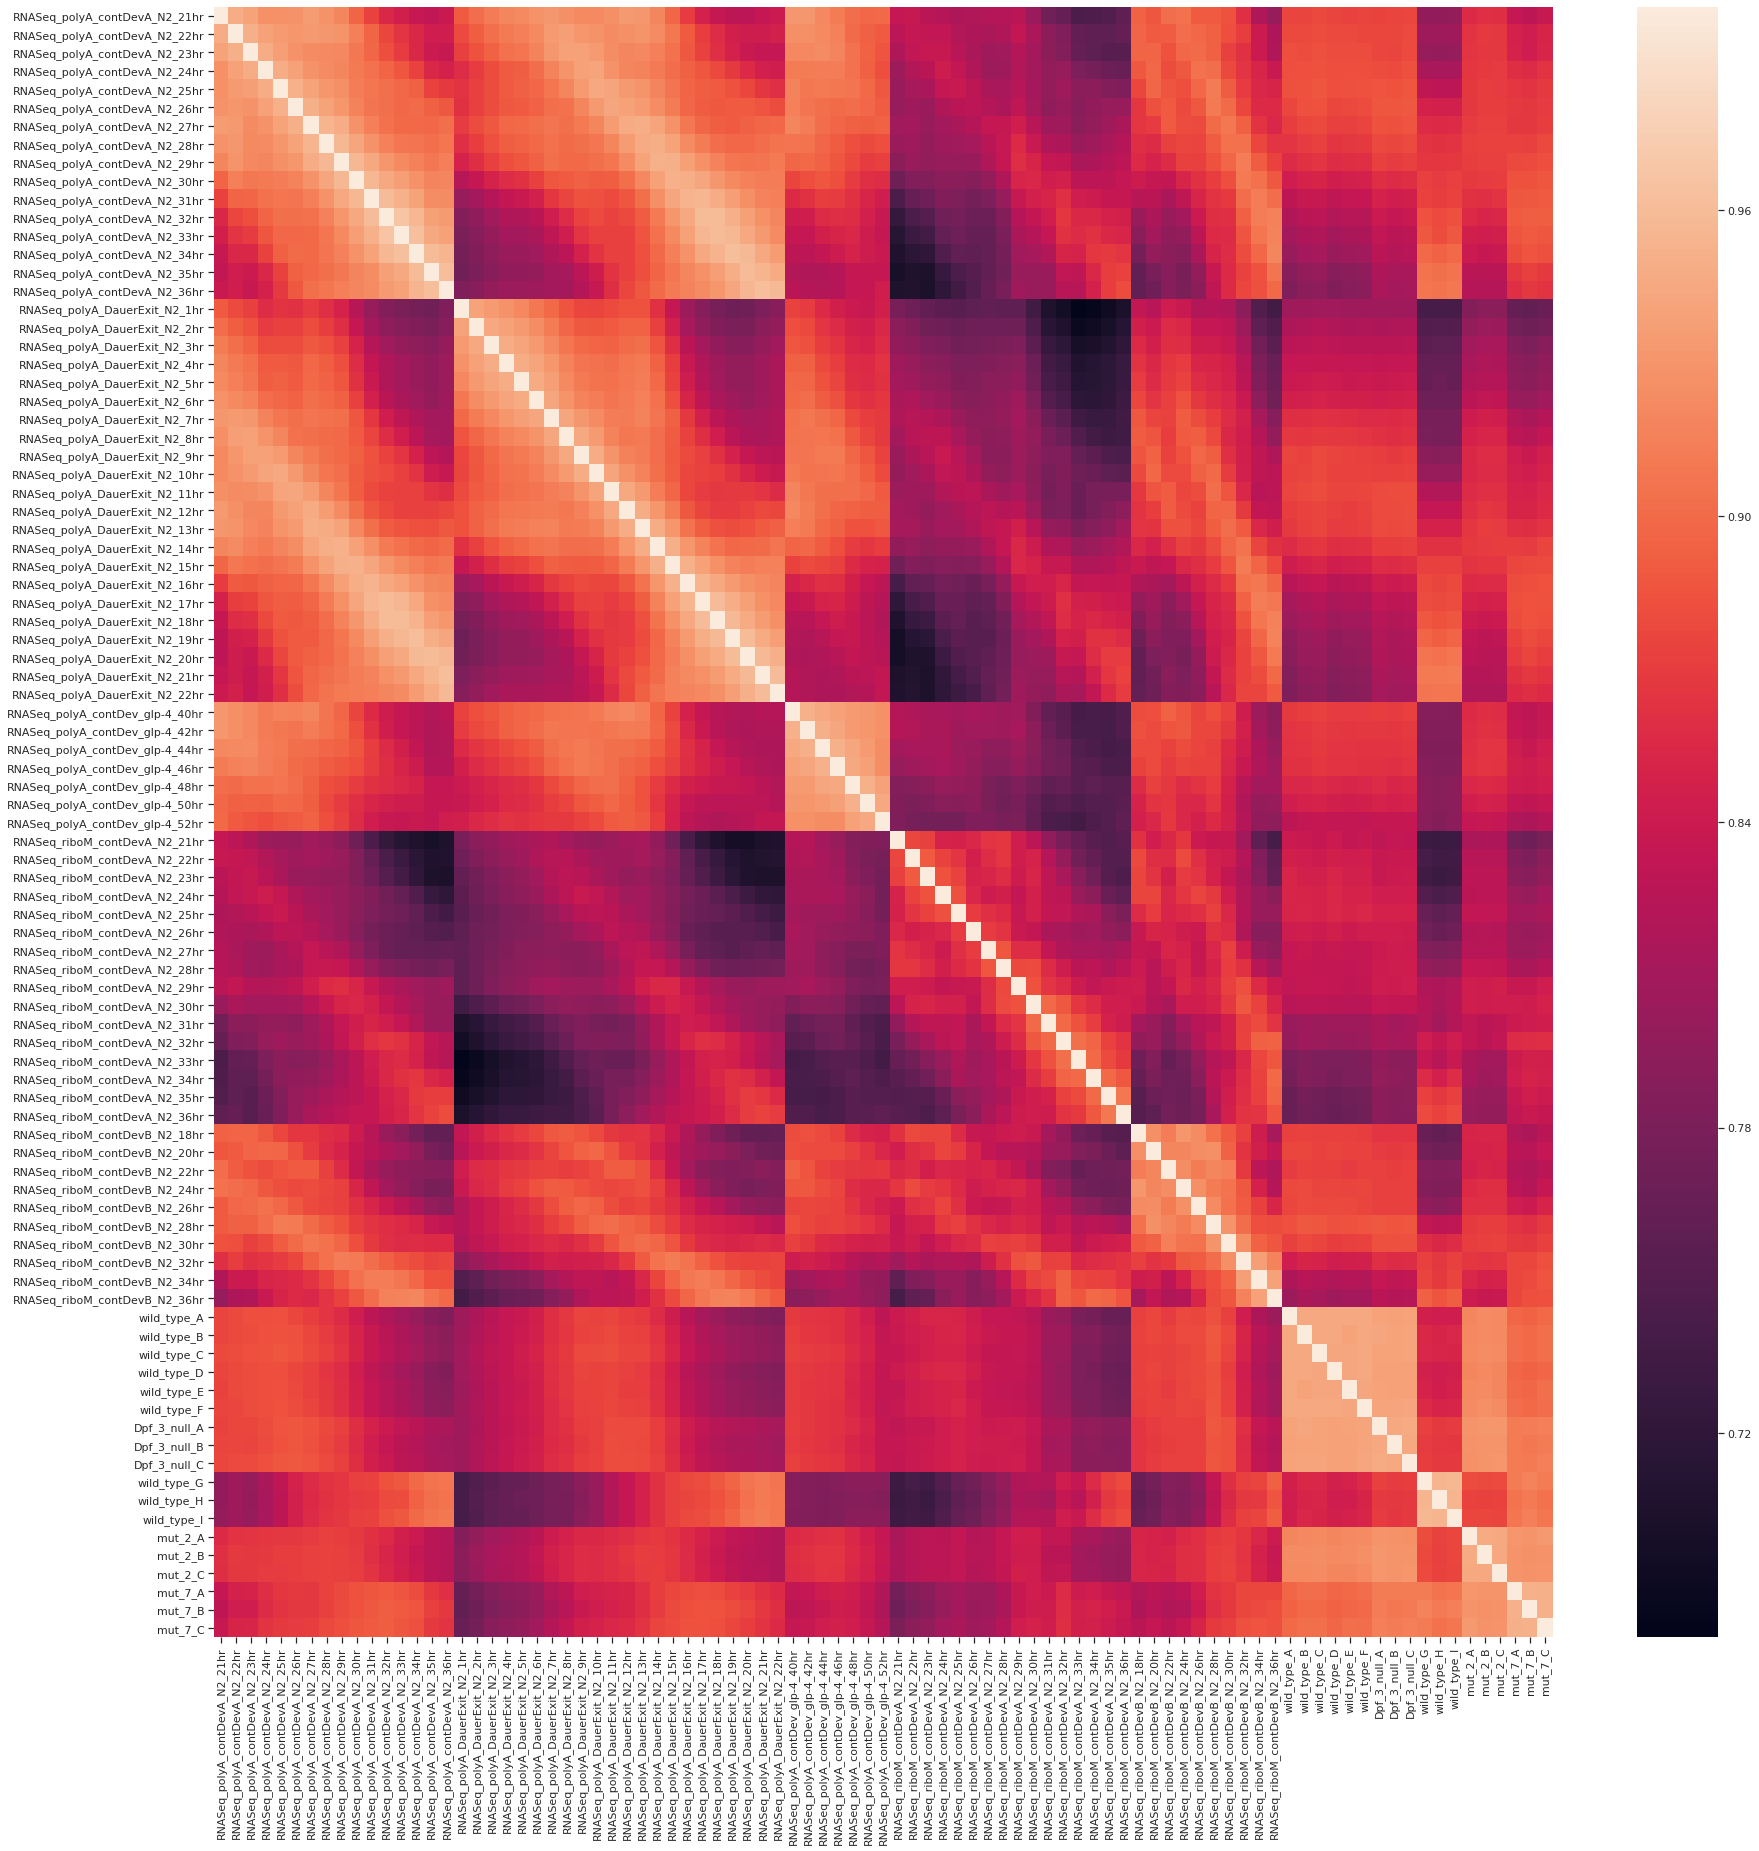

In [13]:
plt.rcParams["figure.figsize"] = (30,30)
g = sns.heatmap(merged_genes.corr(method="spearman"))

In [14]:
merged_osc_genes.columns

Index(['RNASeq_polyA_contDevA_N2_21hr', 'RNASeq_polyA_contDevA_N2_22hr',
       'RNASeq_polyA_contDevA_N2_23hr', 'RNASeq_polyA_contDevA_N2_24hr',
       'RNASeq_polyA_contDevA_N2_25hr', 'RNASeq_polyA_contDevA_N2_26hr',
       'RNASeq_polyA_contDevA_N2_27hr', 'RNASeq_polyA_contDevA_N2_28hr',
       'RNASeq_polyA_contDevA_N2_29hr', 'RNASeq_polyA_contDevA_N2_30hr',
       'RNASeq_polyA_contDevA_N2_31hr', 'RNASeq_polyA_contDevA_N2_32hr',
       'RNASeq_polyA_contDevA_N2_33hr', 'RNASeq_polyA_contDevA_N2_34hr',
       'RNASeq_polyA_contDevA_N2_35hr', 'RNASeq_polyA_contDevA_N2_36hr',
       'RNASeq_polyA_DauerExit_N2_1hr', 'RNASeq_polyA_DauerExit_N2_2hr',
       'RNASeq_polyA_DauerExit_N2_3hr', 'RNASeq_polyA_DauerExit_N2_4hr',
       'RNASeq_polyA_DauerExit_N2_5hr', 'RNASeq_polyA_DauerExit_N2_6hr',
       'RNASeq_polyA_DauerExit_N2_7hr', 'RNASeq_polyA_DauerExit_N2_8hr',
       'RNASeq_polyA_DauerExit_N2_9hr', 'RNASeq_polyA_DauerExit_N2_10hr',
       'RNASeq_polyA_DauerExit_N2_11hr', 'RNASeq_p

In [15]:
l = ['RNASeq_riboM_contDevA_N2_22hr', 'RNASeq_riboM_contDevA_N2_23hr',
     'RNASeq_riboM_contDevA_N2_24hr', 'RNASeq_riboM_contDevA_N2_25hr',
     'RNASeq_riboM_contDevA_N2_26hr', 'RNASeq_riboM_contDevA_N2_27hr',
     'RNASeq_riboM_contDevA_N2_28hr', 'RNASeq_riboM_contDevA_N2_29hr',
     'RNASeq_riboM_contDevA_N2_30hr', 'RNASeq_riboM_contDevA_N2_31hr',
     'RNASeq_riboM_contDevA_N2_32hr', 'RNASeq_riboM_contDevA_N2_33hr',
     'RNASeq_riboM_contDevA_N2_34hr', 'RNASeq_riboM_contDevA_N2_35hr',
     'RNASeq_riboM_contDevA_N2_36hr', 'RNASeq_riboM_contDevB_N2_18hr',
     'RNASeq_riboM_contDevB_N2_20hr', 'RNASeq_riboM_contDevB_N2_22hr',
     'RNASeq_riboM_contDevB_N2_24hr', 'RNASeq_riboM_contDevB_N2_26hr',
     'RNASeq_riboM_contDevB_N2_28hr', 'RNASeq_riboM_contDevB_N2_30hr',
     'RNASeq_riboM_contDevB_N2_32hr', 'RNASeq_riboM_contDevB_N2_34hr',
     'RNASeq_riboM_contDevB_N2_36hr', 'wild_type_A', 'wild_type_B',
     'wild_type_C', 'wild_type_D', 'wild_type_E', 'wild_type_F',
     'Dpf_3_null_A', 'Dpf_3_null_B', 'Dpf_3_null_C', 'wild_type_G',
     'wild_type_H', 'wild_type_I', 'mut_2_A', 'mut_2_B', 'mut_2_C',
     'mut_7_A', 'mut_7_B', 'mut_7_C']

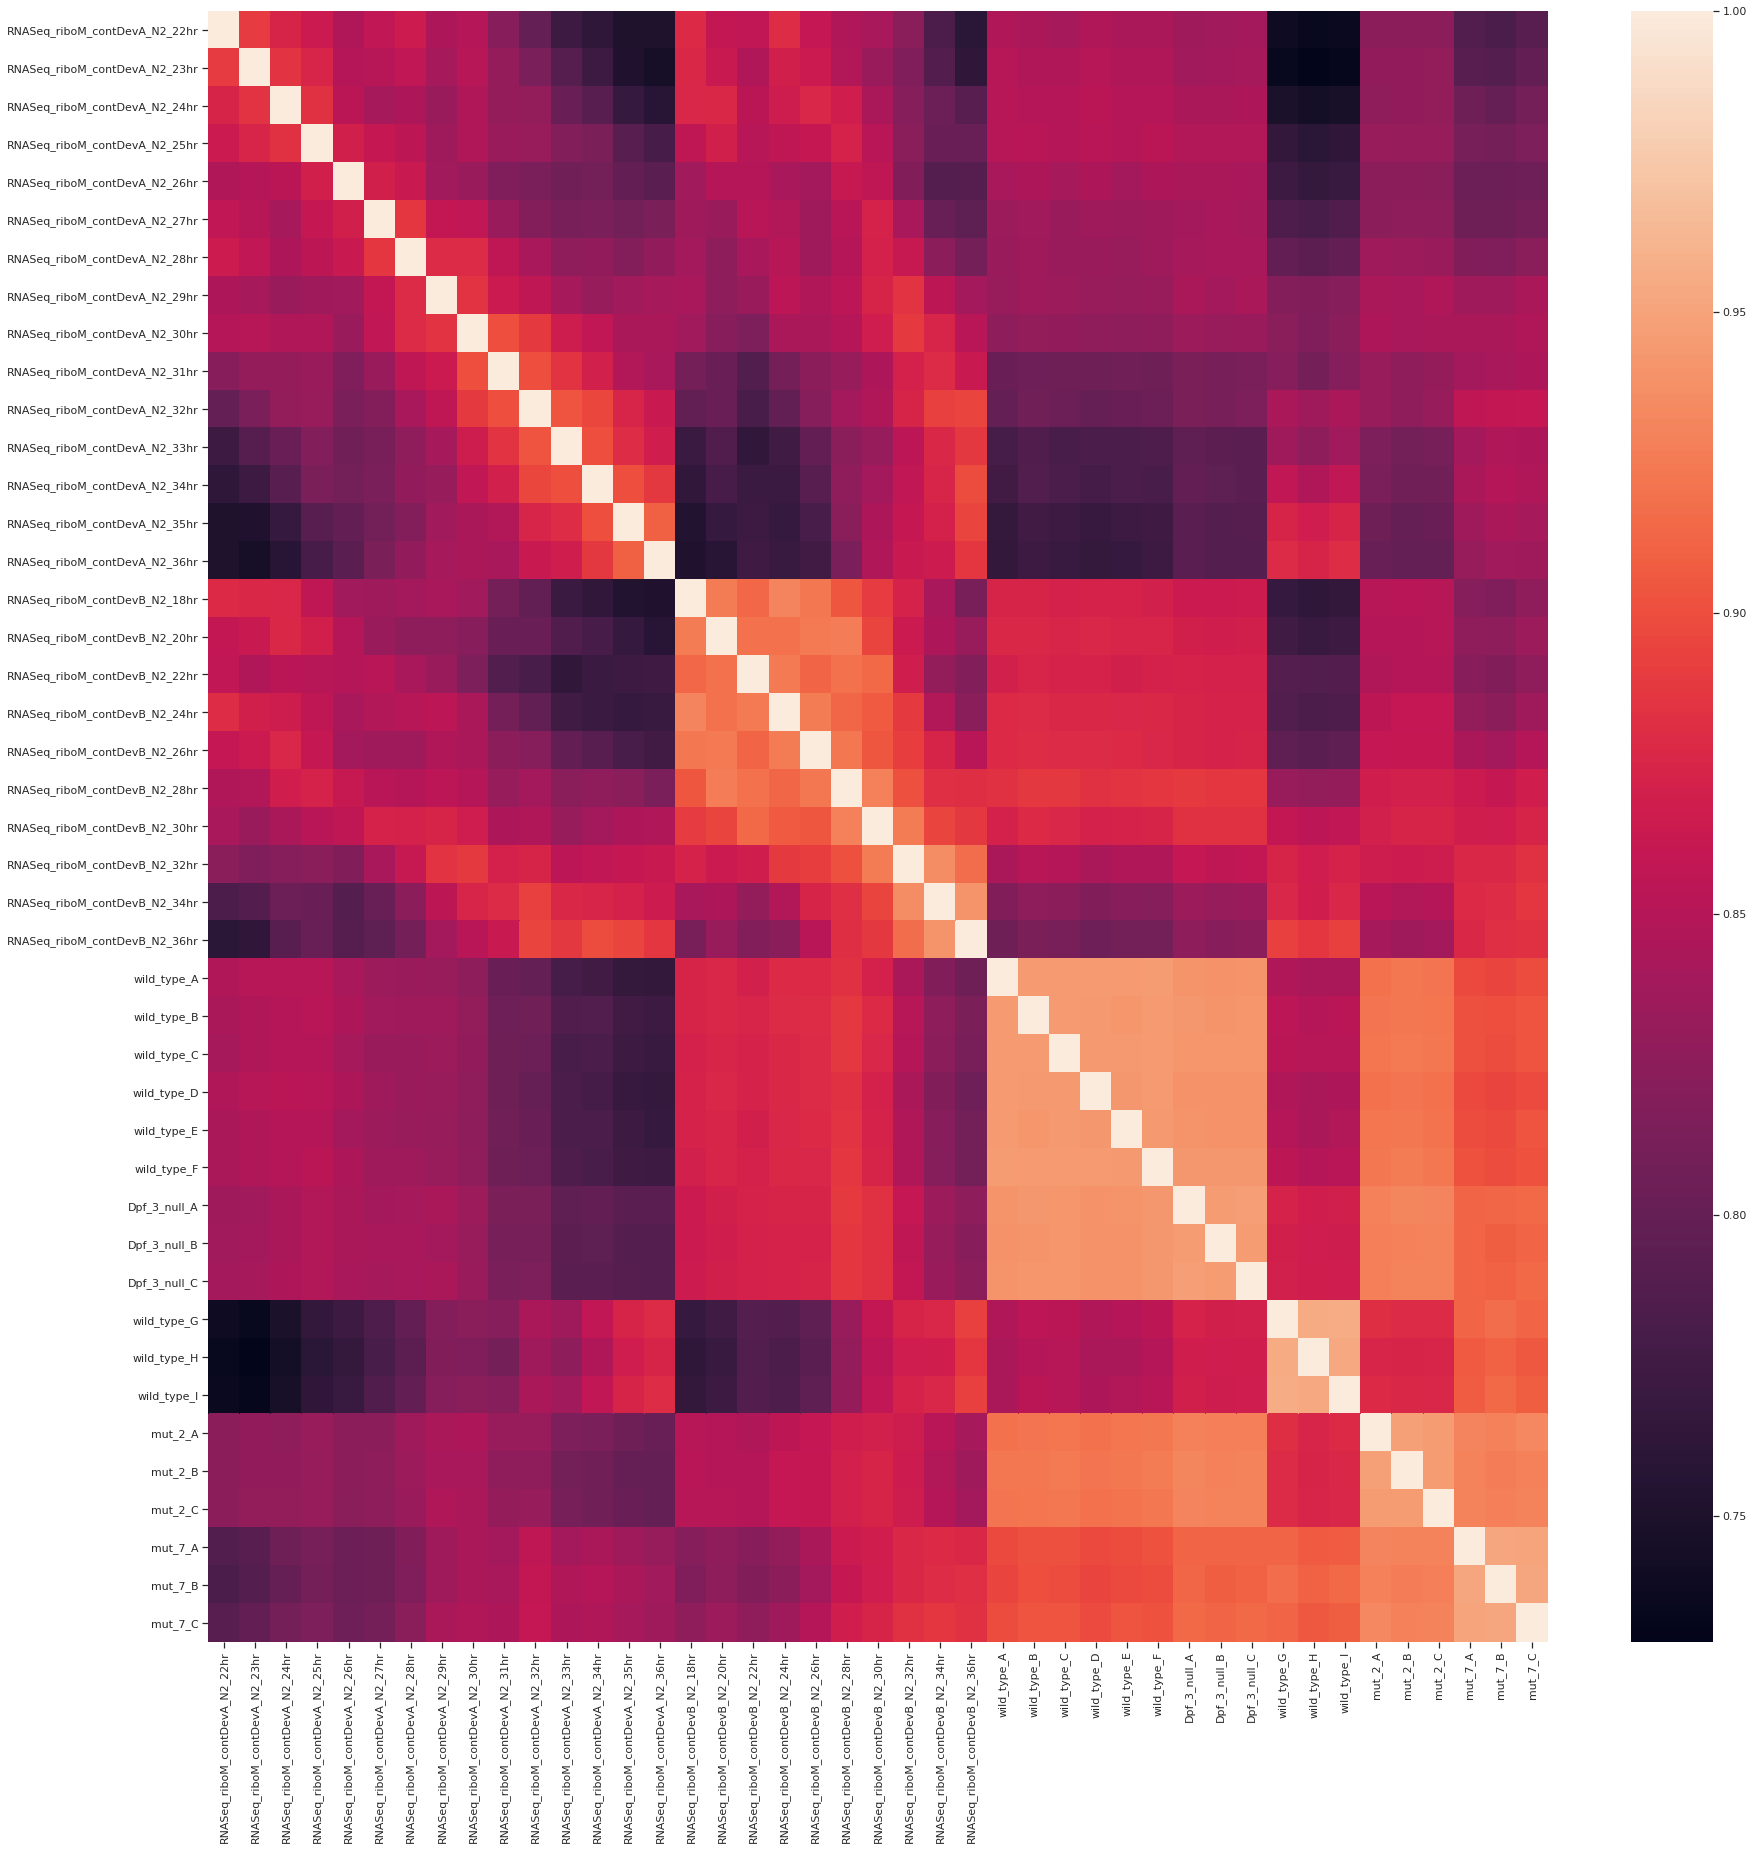

In [16]:
plt.rcParams["figure.figsize"] = (30,30)
g = sns.heatmap(merged_genes[l].corr(method="spearman"))

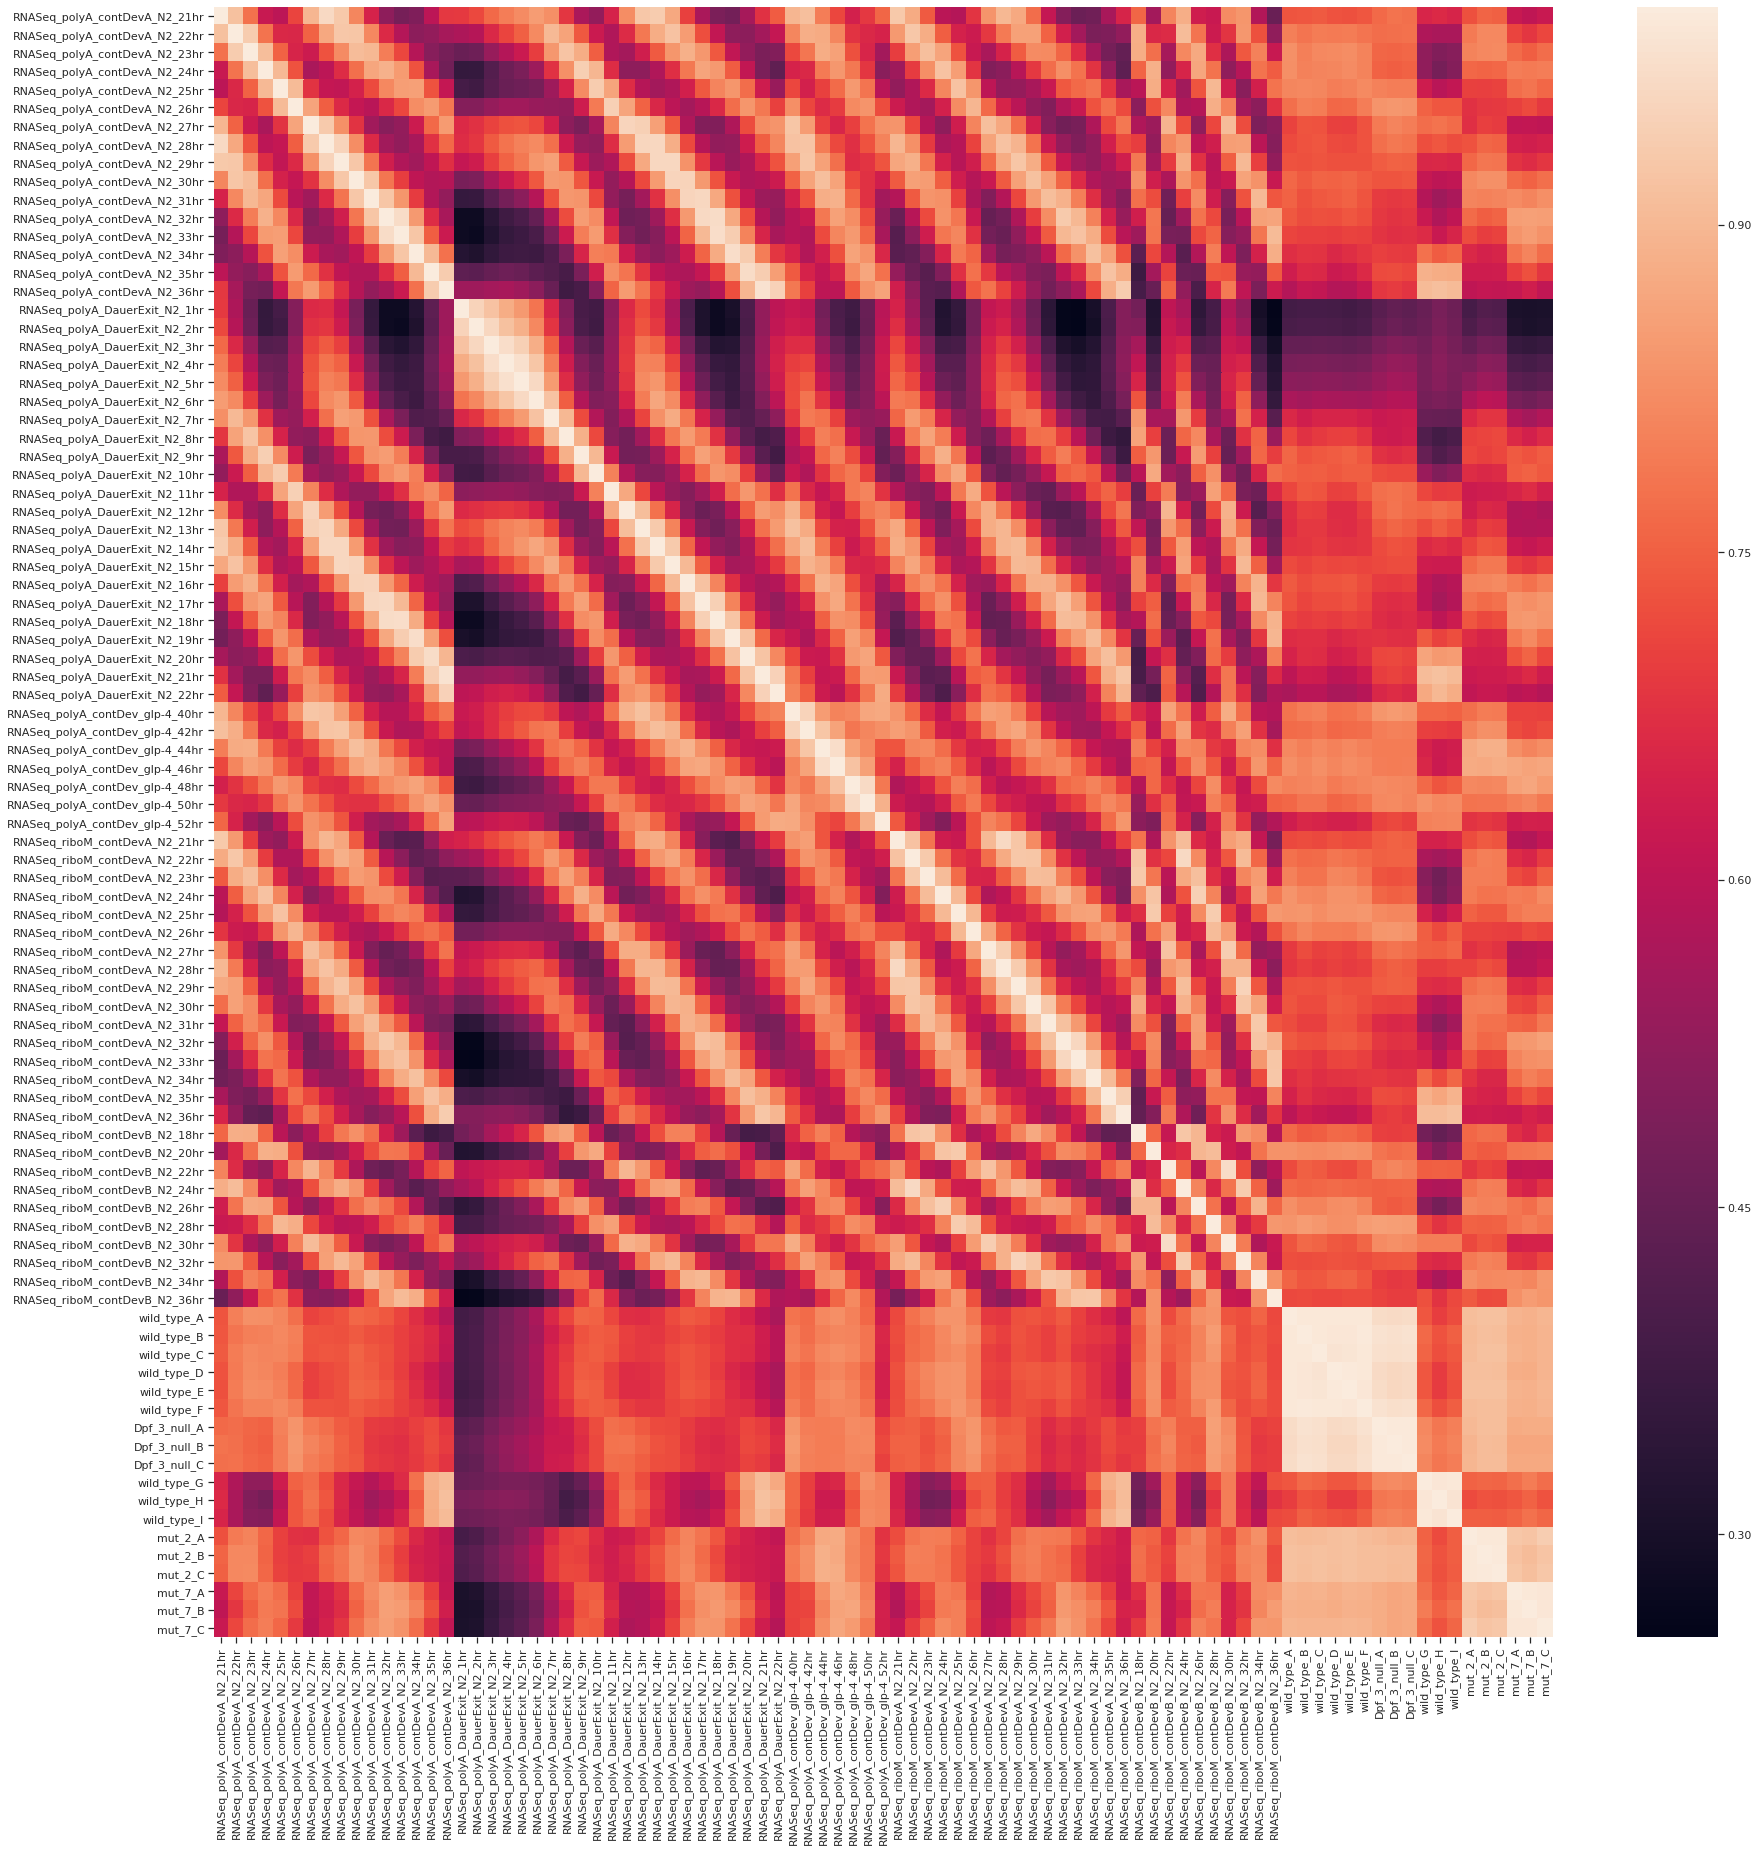

In [17]:
plt.rcParams["figure.figsize"] = (30,30)
g = sns.heatmap(merged_osc_genes.corr(method="spearman"))

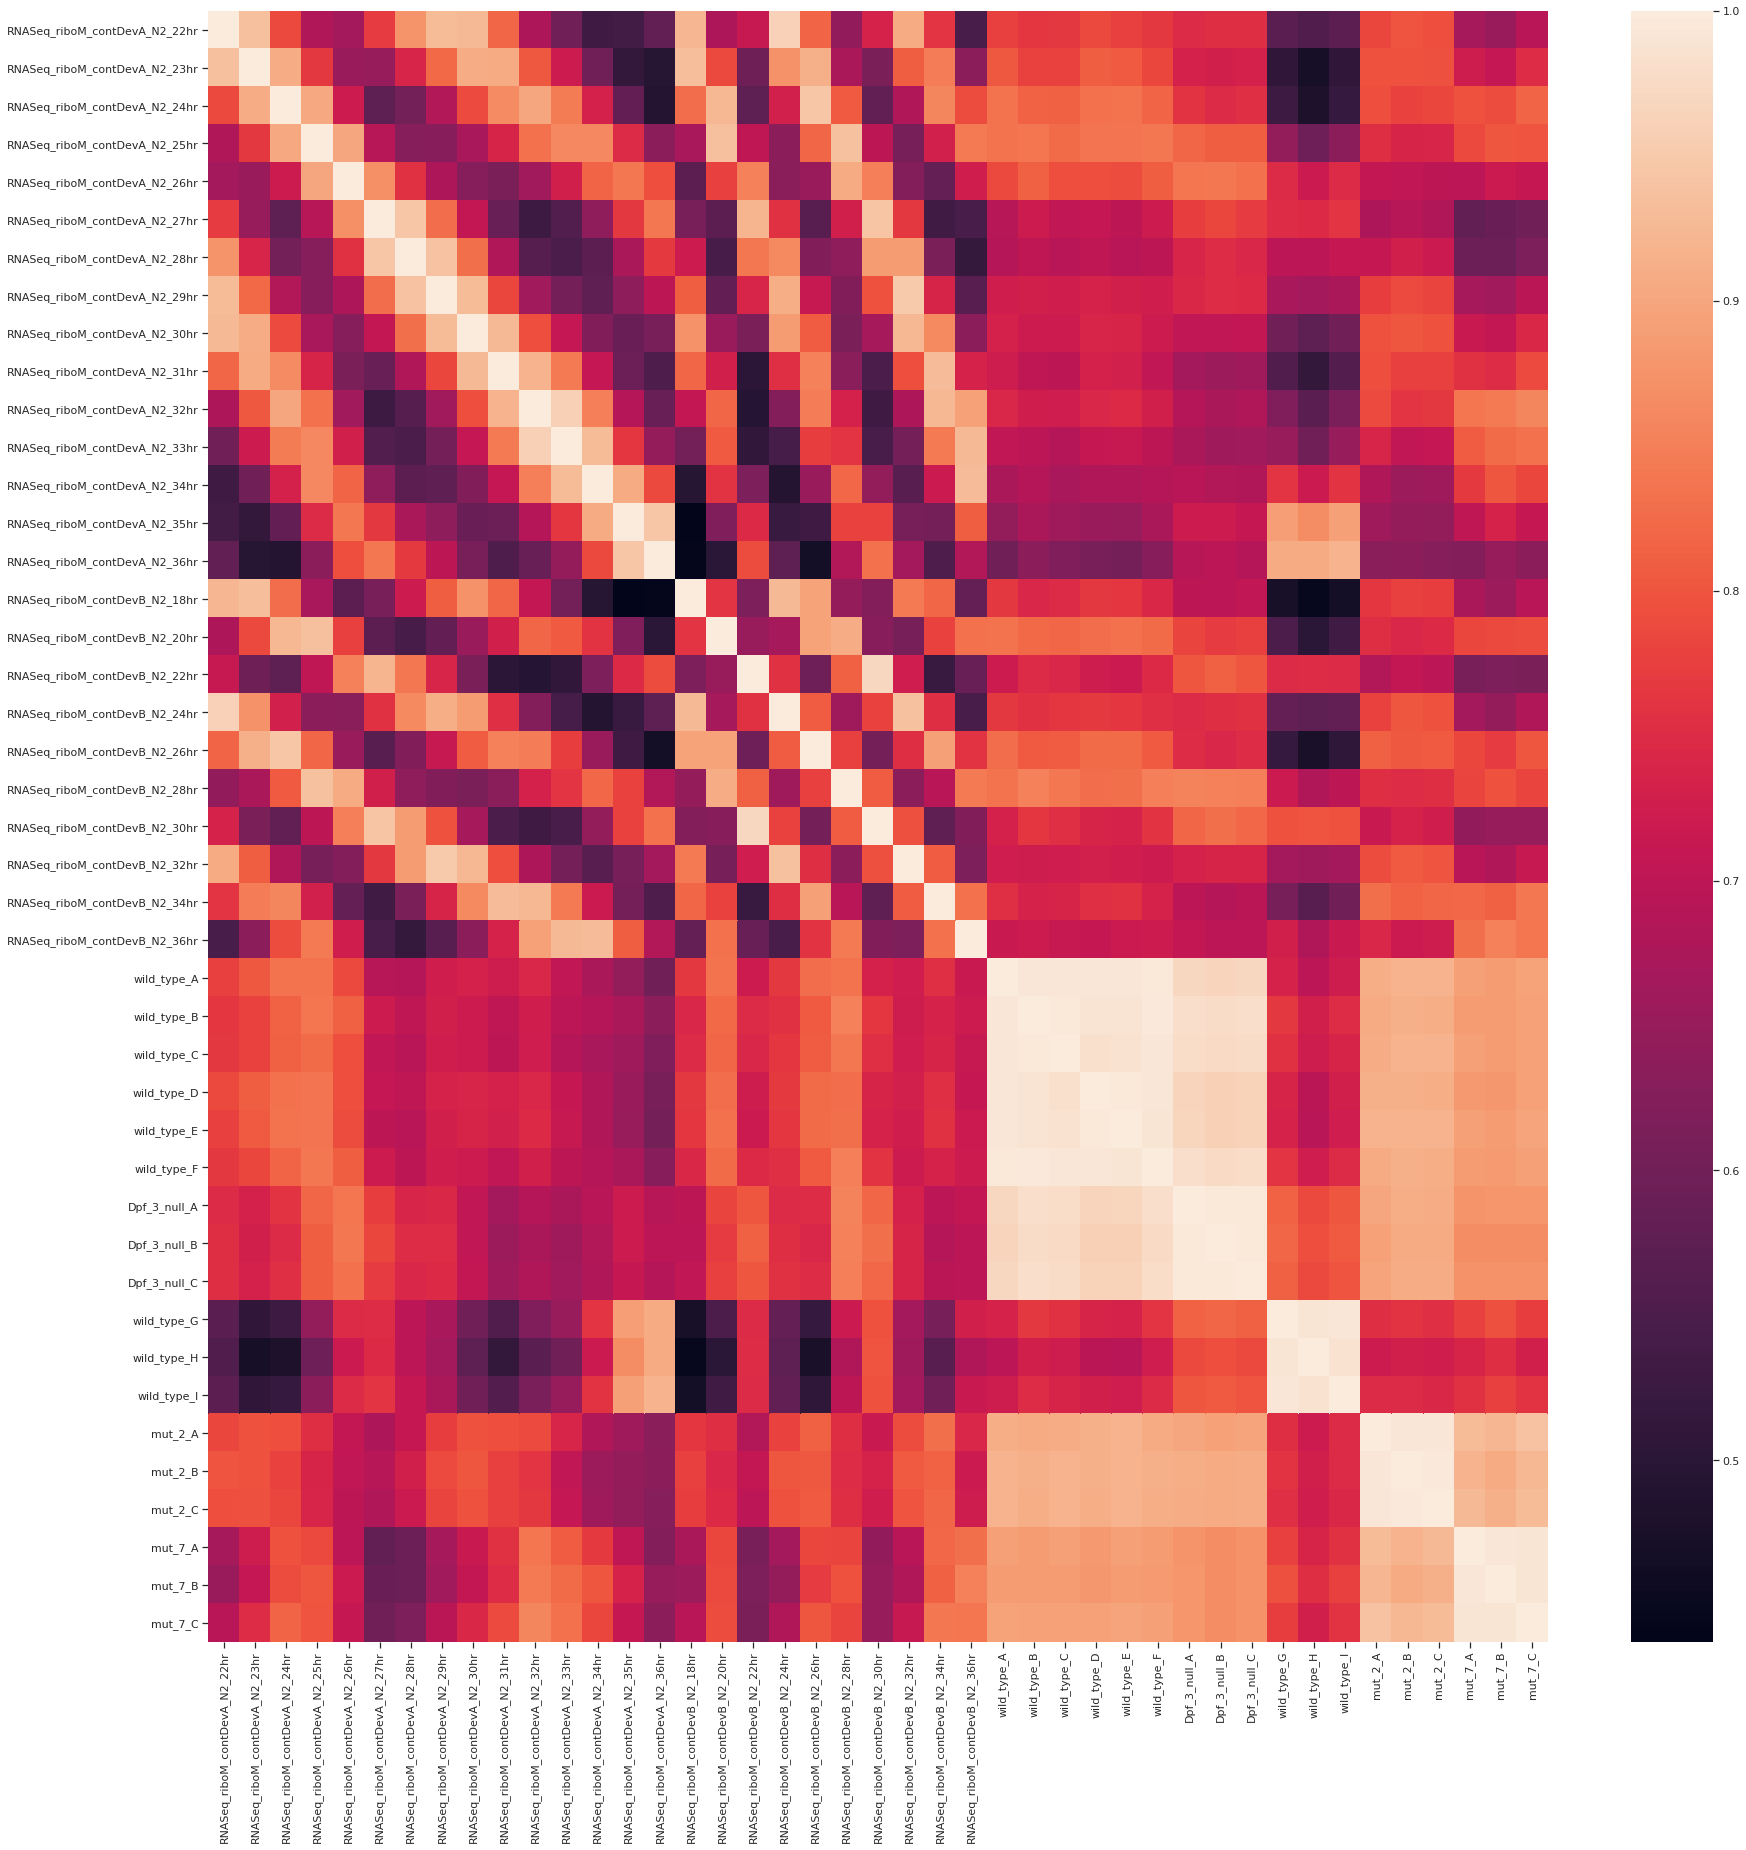

In [18]:
plt.rcParams["figure.figsize"] = (30,30)
g = sns.heatmap(merged_osc_genes[l].corr(method="spearman"))